In [35]:
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
import seaborn as sns
import sklearn
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [36]:
data=pd.read_csv('file:///F:/GOOG.csv')
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-02-16 00:00:00+00:00,691.00,698.0000,685.05,692.98,2520021,691.00,698.0000,685.05,692.98,2520021,0.0,1.0
1,GOOG,2016-02-17 00:00:00+00:00,708.40,709.7500,691.38,699.00,2492634,708.40,709.7500,691.38,699.00,2492634,0.0,1.0
2,GOOG,2016-02-18 00:00:00+00:00,697.35,712.3500,696.03,710.00,1883248,697.35,712.3500,696.03,710.00,1883248,0.0,1.0
3,GOOG,2016-02-19 00:00:00+00:00,700.91,703.0805,694.05,695.03,1589281,700.91,703.0805,694.05,695.03,1589281,0.0,1.0
4,GOOG,2016-02-22 00:00:00+00:00,706.46,713.2400,702.51,707.45,1949816,706.46,713.2400,702.51,707.45,1949816,0.0,1.0


In [37]:
data.shape

(1257, 14)

In [38]:
data.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [40]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-02-16 00:00:00+00:00,691.00,698.0000,685.05,692.98,2520021,691.00,698.0000,685.05,692.98,2520021,0.0,1.0
1,GOOG,2016-02-17 00:00:00+00:00,708.40,709.7500,691.38,699.00,2492634,708.40,709.7500,691.38,699.00,2492634,0.0,1.0
2,GOOG,2016-02-18 00:00:00+00:00,697.35,712.3500,696.03,710.00,1883248,697.35,712.3500,696.03,710.00,1883248,0.0,1.0
3,GOOG,2016-02-19 00:00:00+00:00,700.91,703.0805,694.05,695.03,1589281,700.91,703.0805,694.05,695.03,1589281,0.0,1.0
4,GOOG,2016-02-22 00:00:00+00:00,706.46,713.2400,702.51,707.45,1949816,706.46,713.2400,702.51,707.45,1949816,0.0,1.0


In [43]:
data['data']= pd.to_datetime(data['date'])

In [55]:
dates=[]
for i in range(len(data)):
    dates.append(data['date'].iloc[i][0:10]) 

In [56]:
data

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,data
0,2016-02-16 00:00:00+00:00,691.00,698.0000,685.05,692.98,2520021,691.00,698.0000,685.05,692.98,2520021,0.0,1.0,2016-02-16 00:00:00+00:00
1,2016-02-17 00:00:00+00:00,708.40,709.7500,691.38,699.00,2492634,708.40,709.7500,691.38,699.00,2492634,0.0,1.0,2016-02-17 00:00:00+00:00
2,2016-02-18 00:00:00+00:00,697.35,712.3500,696.03,710.00,1883248,697.35,712.3500,696.03,710.00,1883248,0.0,1.0,2016-02-18 00:00:00+00:00
3,2016-02-19 00:00:00+00:00,700.91,703.0805,694.05,695.03,1589281,700.91,703.0805,694.05,695.03,1589281,0.0,1.0,2016-02-19 00:00:00+00:00
4,2016-02-22 00:00:00+00:00,706.46,713.2400,702.51,707.45,1949816,706.46,713.2400,702.51,707.45,1949816,0.0,1.0,2016-02-22 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2021-02-04 00:00:00+00:00,2062.37,2078.5500,2042.59,2068.89,1852329,2062.37,2078.5500,2042.59,2068.89,1852329,0.0,1.0,2021-02-04 00:00:00+00:00
1253,2021-02-05 00:00:00+00:00,2098.00,2102.5100,2059.33,2070.00,1535135,2098.00,2102.5100,2059.33,2070.00,1535135,0.0,1.0,2021-02-05 00:00:00+00:00
1254,2021-02-08 00:00:00+00:00,2092.91,2123.5469,2072.00,2105.91,1242411,2092.91,2123.5469,2072.00,2105.91,1242411,0.0,1.0,2021-02-08 00:00:00+00:00
1255,2021-02-09 00:00:00+00:00,2083.51,2105.1300,2078.54,2078.54,886247,2083.51,2105.1300,2078.54,2078.54,886247,0.0,1.0,2021-02-09 00:00:00+00:00


In [57]:
data['date']= pd.to_datetime(dates)

In [58]:
data['date'].duplicated().sum()

0

In [59]:
r = pd.date_range(start=data.date.min(), end=data.date.max())
data= data.set_index('date').reindex(r).fillna(np.nan).rename_axis('date').reset_index()

In [60]:
data.head(10)

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,data
0,2016-02-16,691.00,698.0000,685.050,692.98,2520021.0,691.00,698.0000,685.050,692.98,2520021.0,0.0,1.0,2016-02-16 00:00:00+00:00
1,2016-02-17,708.40,709.7500,691.380,699.00,2492634.0,708.40,709.7500,691.380,699.00,2492634.0,0.0,1.0,2016-02-17 00:00:00+00:00
2,2016-02-18,697.35,712.3500,696.030,710.00,1883248.0,697.35,712.3500,696.030,710.00,1883248.0,0.0,1.0,2016-02-18 00:00:00+00:00
3,2016-02-19,700.91,703.0805,694.050,695.03,1589281.0,700.91,703.0805,694.050,695.03,1589281.0,0.0,1.0,2016-02-19 00:00:00+00:00
4,2016-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5,2016-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
6,2016-02-22,706.46,713.2400,702.510,707.45,1949816.0,706.46,713.2400,702.510,707.45,1949816.0,0.0,1.0,2016-02-22 00:00:00+00:00
7,2016-02-23,695.85,708.4000,693.580,701.45,2009280.0,695.85,708.4000,693.580,701.45,2009280.0,0.0,1.0,2016-02-23 00:00:00+00:00
8,2016-02-24,699.56,700.0000,680.780,688.92,1963573.0,699.56,700.0000,680.780,688.92,1963573.0,0.0,1.0,2016-02-24 00:00:00+00:00
9,2016-02-25,705.75,705.9800,690.585,700.01,1642166.0,705.75,705.9800,690.585,700.01,1642166.0,0.0,1.0,2016-02-25 00:00:00+00:00


In [61]:
data.drop(['date', 'data'], axis=1, inplace= True)
cl_names= list(data.columns)

In [62]:
for i in cl_names:
    data[i]= data[i].interpolate()

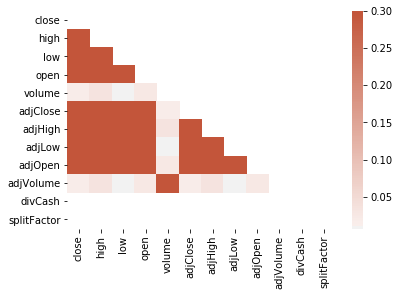

In [63]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0)

In [64]:
from statsmodels.tsa.stattools import adfuller
series1= data['open']
result = adfuller(series1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
 
print('**********************')
series2= data['close']
result = adfuller(series2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.872137
p-value: 0.992716
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
**********************
ADF Statistic: 0.819341
p-value: 0.991942
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Text(0.5, 0, 'open')

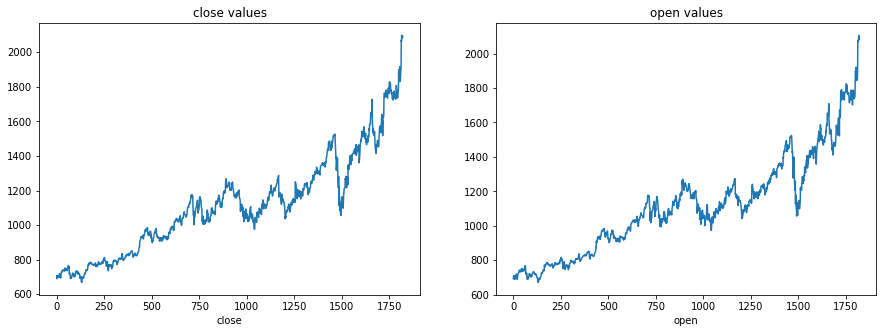

In [65]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(data['close']) 
plt.title('close values')
plt.xlabel('close')
plt.subplot(1,2,2)
plt.plot(data['open'])
plt.title('open values')
plt.xlabel('open')

In [66]:
train = data.iloc[0:int(0.8*len(data)), :]
test= data.iloc[int(0.8*len(data)):, :]

In [67]:
test.shape

(365, 12)

In [68]:
test

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1457,1518.270000,1520.6900,1508.110000,1514.48,1.167565e+06,1518.270000,1520.6900,1508.110000,1514.48,1.167565e+06,0.0,1.0
1458,1514.660000,1527.1800,1504.600000,1512.69,9.297300e+05,1514.660000,1527.1800,1504.600000,1512.69,9.297300e+05,0.0,1.0
1459,1520.740000,1520.7400,1507.340000,1515.60,1.197836e+06,1520.740000,1520.7400,1507.340000,1515.60,1.197836e+06,0.0,1.0
1460,1520.472500,1523.4625,1508.652500,1515.45,1.178662e+06,1520.472500,1523.4625,1508.652500,1515.45,1.178662e+06,0.0,1.0
1461,1520.205000,1526.1850,1509.965000,1515.30,1.159488e+06,1520.205000,1526.1850,1509.965000,1515.30,1.159488e+06,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1817,2096.303333,2109.5223,2063.553333,2081.97,1.437560e+06,2096.303333,2109.5223,2063.553333,2081.97,1.437560e+06,0.0,1.0
1818,2094.606667,2116.5346,2067.776667,2093.94,1.339986e+06,2094.606667,2116.5346,2067.776667,2093.94,1.339986e+06,0.0,1.0
1819,2092.910000,2123.5469,2072.000000,2105.91,1.242411e+06,2092.910000,2123.5469,2072.000000,2105.91,1.242411e+06,0.0,1.0
1820,2083.510000,2105.1300,2078.540000,2078.54,8.862470e+05,2083.510000,2105.1300,2078.540000,2078.54,8.862470e+05,0.0,1.0


In [69]:
train.drop(['divCash', 'splitFactor'], axis=1, inplace= True)
test.drop(['divCash', 'splitFactor'], axis=1, inplace= True)

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
def VarForecasting(Actual):
        model = VAR(Actual)
        model_fit = model.fit()
        prediction = model_fit.forecast(model_fit.y, steps=10) # predicting all the next 10 values at each step
        return np.array(prediction)

In [71]:
data.drop(['divCash', 'splitFactor'], axis=1, inplace= True)

In [72]:
close_predictions=[]
open_predictions=[]
for timepoint in range(0, len(test)):
    Actual_train = data.iloc[timepoint:timepoint + len(train)]
    Prediction = VarForecasting(Actual_train)
    close_predictions.append(Prediction[:,0])
    open_predictions.append(Prediction[:,3])

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [73]:
close_predictions[0]

array([1511.37251446, 1512.57080315, 1513.25678039, 1513.74003838,
       1514.1364764 , 1514.49222639, 1514.82704639, 1515.15014229,
       1515.46619735, 1515.77779469])

In [74]:
np.array(close_predictions).shape

(365, 10)

In [75]:
test.shape

(365, 10)

In [76]:
p_close= [close_predictions[i][0] for i in range(len(close_predictions))]
p_open= [open_predictions[i][0] for i in range(len(open_predictions))]

Text(0.5, 0, 'open')

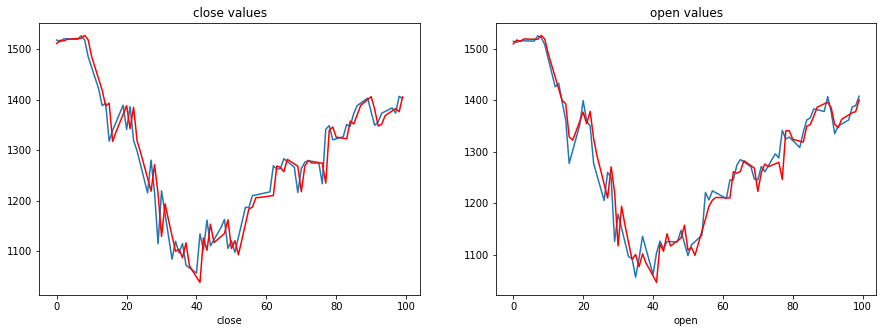

In [77]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.array(test['close'])[0:100])
plt.plot(p_close[0:100],'r')
plt.title('close values')
plt.xlabel('close')
plt.subplot(1,2,2)
plt.plot(np.array(test['open'])[0:100])
plt.plot(p_open[0:100], 'r' )
plt.title('open values')
plt.xlabel('open')

In [78]:
from sklearn.metrics import mean_squared_error
import math 
print(math.sqrt(mean_squared_error(np.array(test['open']),p_open )))
print(math.sqrt(mean_squared_error(np.array(test['close']),p_close )))

20.206816308818066
26.488846842551084
